# Revised and simplified version of cs2

In [ ]:
#what else can be done or any question
#normalize the x? before training
#how to undo normalized in normalization
#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Simple Exploratory Data Analysis

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#change name column to lowercase is easier to proceed

# Make column labels lowercase
df.columns = map(str.lower, df.columns)

# Replace spaces in columns with underscore
df.columns = df.columns.str.replace('\s+', '_')

In [5]:
#number of rows and columns
print('Data: \n')
print("Number of columns: "+ str(df.shape[1]))
print("Number of rows: "+ str(df.shape[0]))

Data: 

Number of columns: 14
Number of rows: 303


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

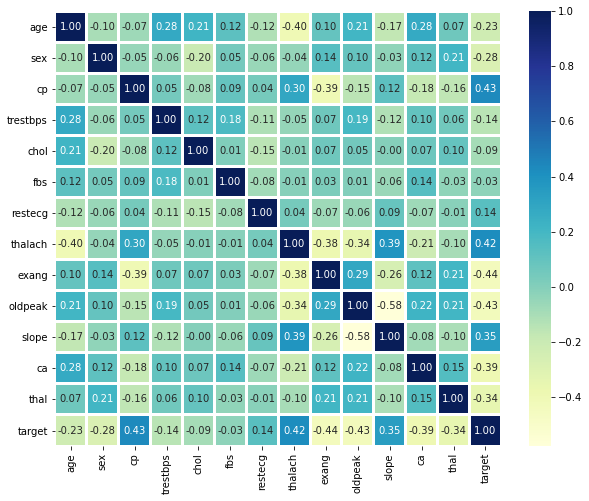

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

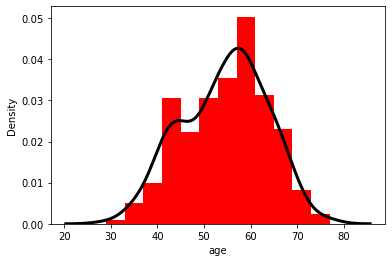

In [10]:
sns.distplot(df['age'],color='Red',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})


# Preprocessing 

In [11]:
#check outlier
#1.iqr
#2.zscore

In [18]:
#using zscore to detect outliers
#good god im lazy...im using zscore because its looks easier to do
df.shape

(303, 14)

In [19]:
z = np.abs(stats.zscore(df))

In [20]:
z = np.abs(stats.zscore(df))

In [21]:
df1 = df[(z < 3).all(axis=1)]

In [22]:
df1.shape

(287, 14)

In [23]:
#check missing data

In [27]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
df1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [30]:
#feature engineering

In [31]:
#some of the features are categorical...
#sex,cp,fbs,restecg,exang,slope,ca,thal,target
#double check this with the definition documents
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df1['sex']=df1['sex'].astype('category')
df1['cp']=df1['cp'].astype('category')
df1['fbs']=df1['fbs'].astype('category')
df1['restecg']=df1['restecg'].astype('category')
df1['exang']=df1['exang'].astype('category')
df1['slope']=df1['slope'].astype('category')
df1['ca']=df1['ca'].astype('category')
df1['thal']=df1['thal'].astype('category')
df1['target']=df1['target'].astype('category')

C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [38]:
df1.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [39]:
#one hot encoding 
#use this for those categorical datatype..rmmbr to remove first dupe

df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3,target_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


# machine learning 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from joblib import dump
from sklearn import metrics

In [94]:
x = df1.drop('target_1',axis=1)
y = df1['target_1']

In [95]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1,random_state=101)

In [96]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
log_model= LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [98]:
#penalty
penalty= ['l1']

#use logarithmic spaced c values
C = [1.0]

In [99]:
grid_model=GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [100]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': [1.0], 'penalty': ['l1']})

In [101]:
best_model = grid_model.best_estimator_

In [102]:
a =best_model.coef_
a

array([[ 0.06657233, -0.17629981, -0.19489068,  0.38394237, -0.47691846,
        -0.71287154,  0.28500017,  0.71587981,  0.49328328,  0.12046904,
         0.16201473,  0.        , -0.39151995, -0.39672369,  0.20970317,
        -0.79603399, -0.94093465, -0.43154142,  0.        , -0.63540368]])

In [103]:
y_pred =grid_model.predict(x_test)

In [104]:
accuracy_score(y_test,y_pred)

0.896551724137931

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [109]:

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[13  1]
 [ 2 13]]


In [110]:
#save the scaler and model for deployment
dump(scaler,"casestudy2.pkl")

['casestudy2.pkl']

In [111]:
dump(grid_model,"casestudy2.h5")

['casestudy2.h5']